# tut-11 : CodeBasics
Support Vector Machine

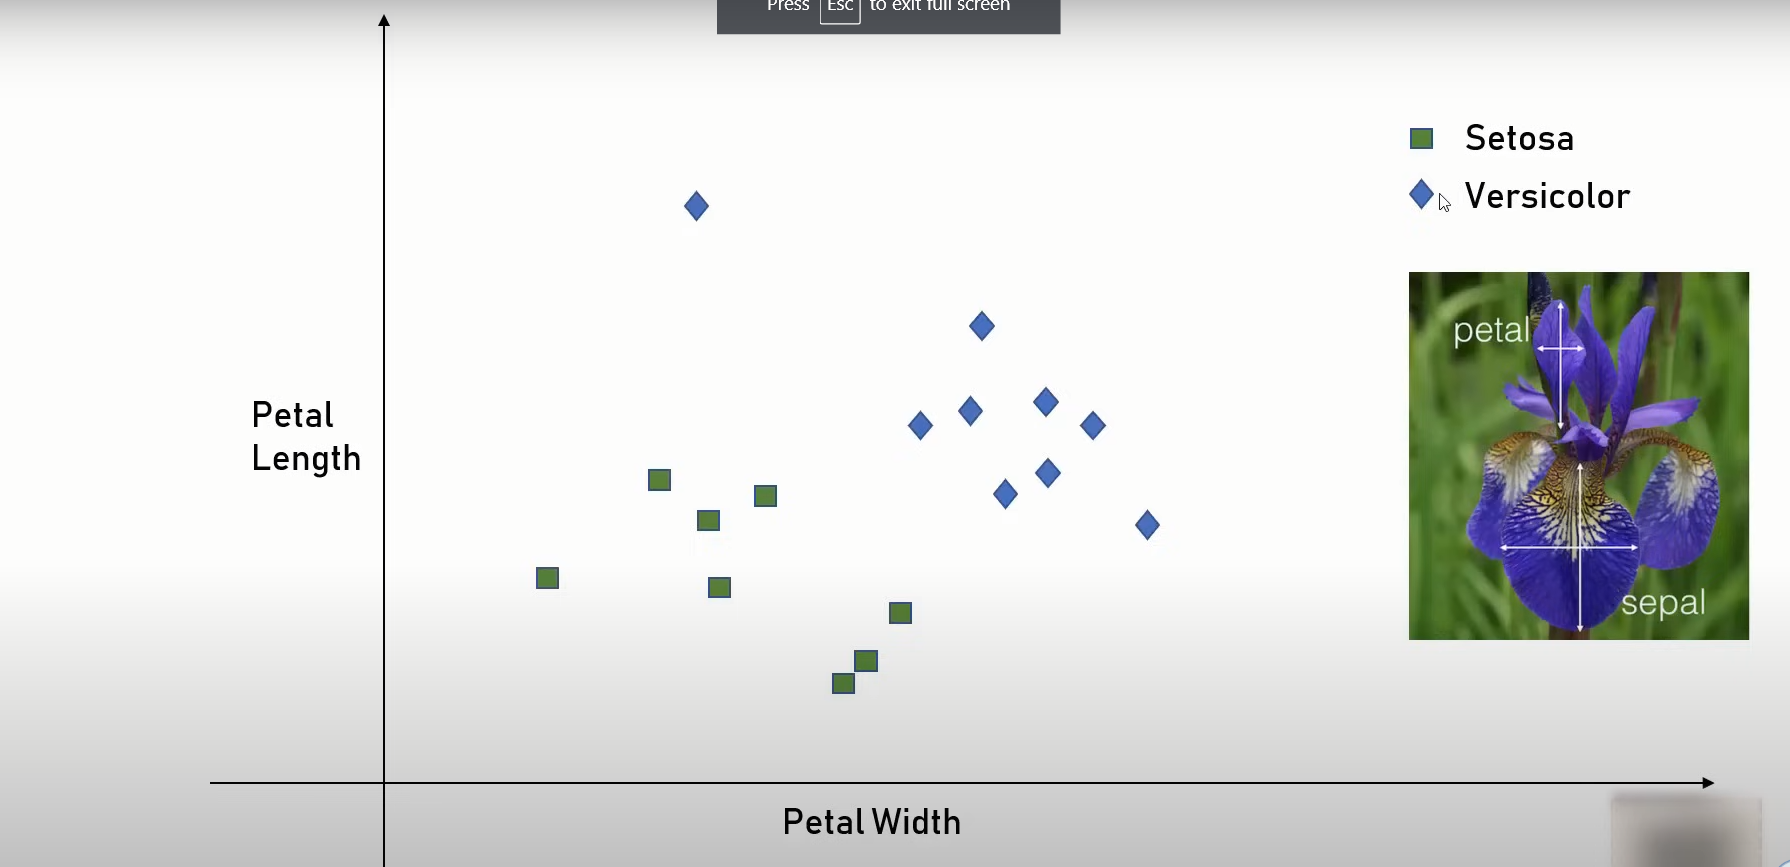 

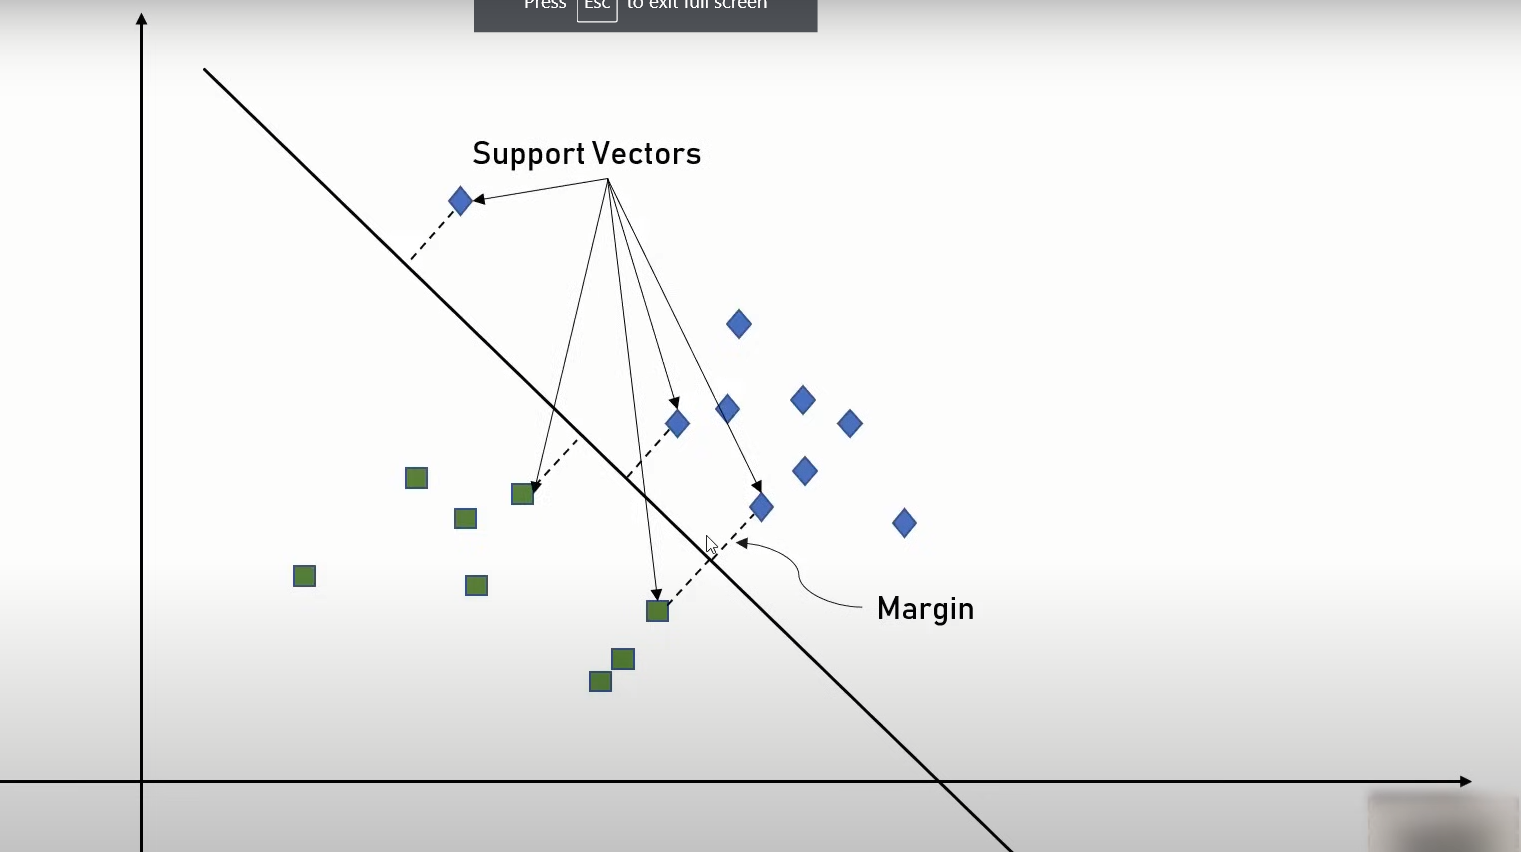

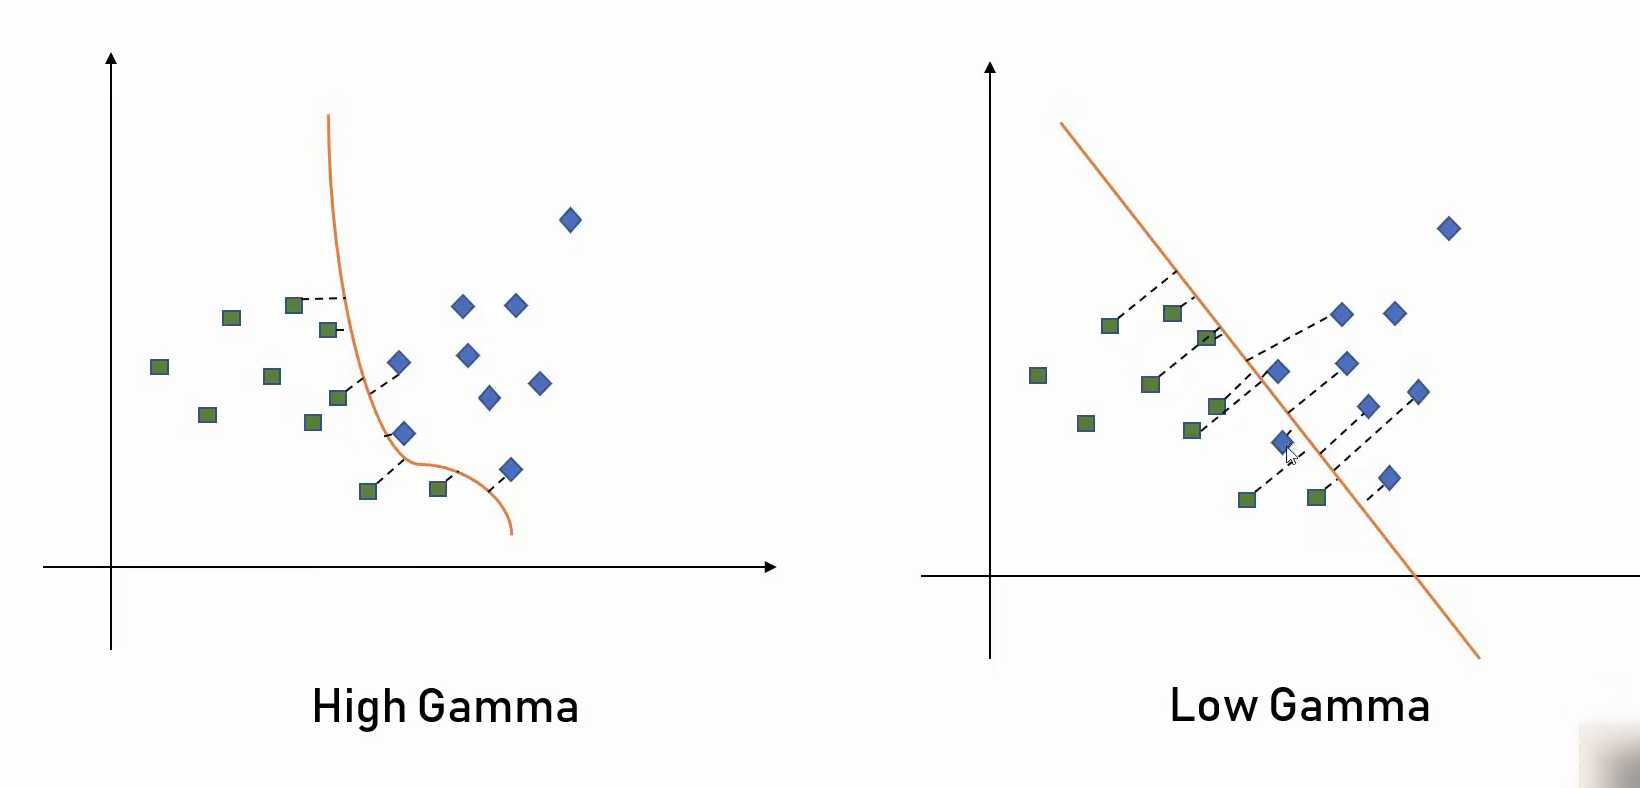

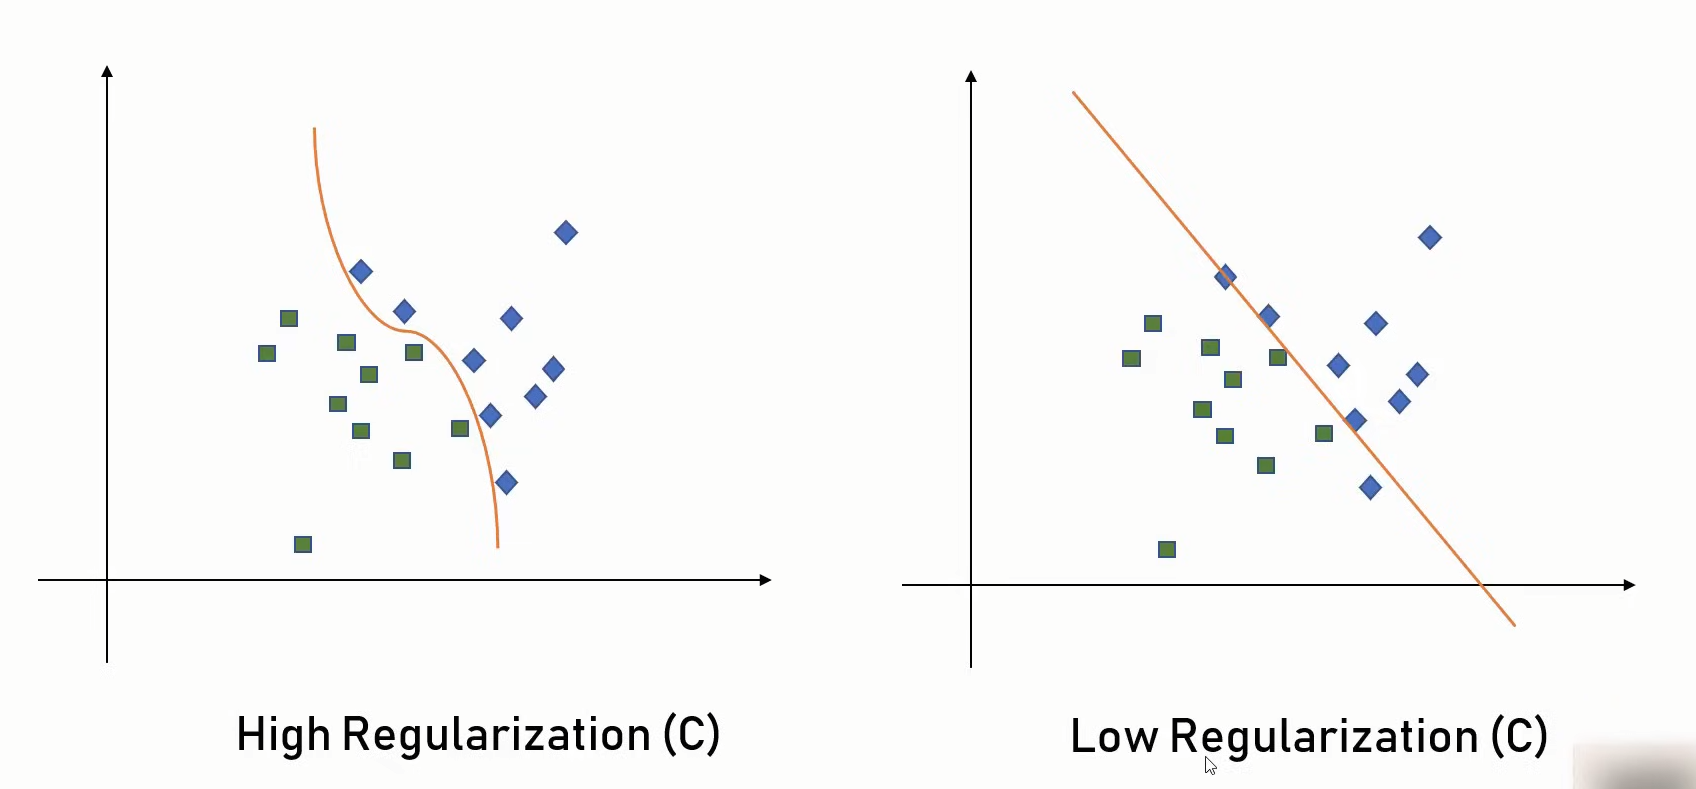

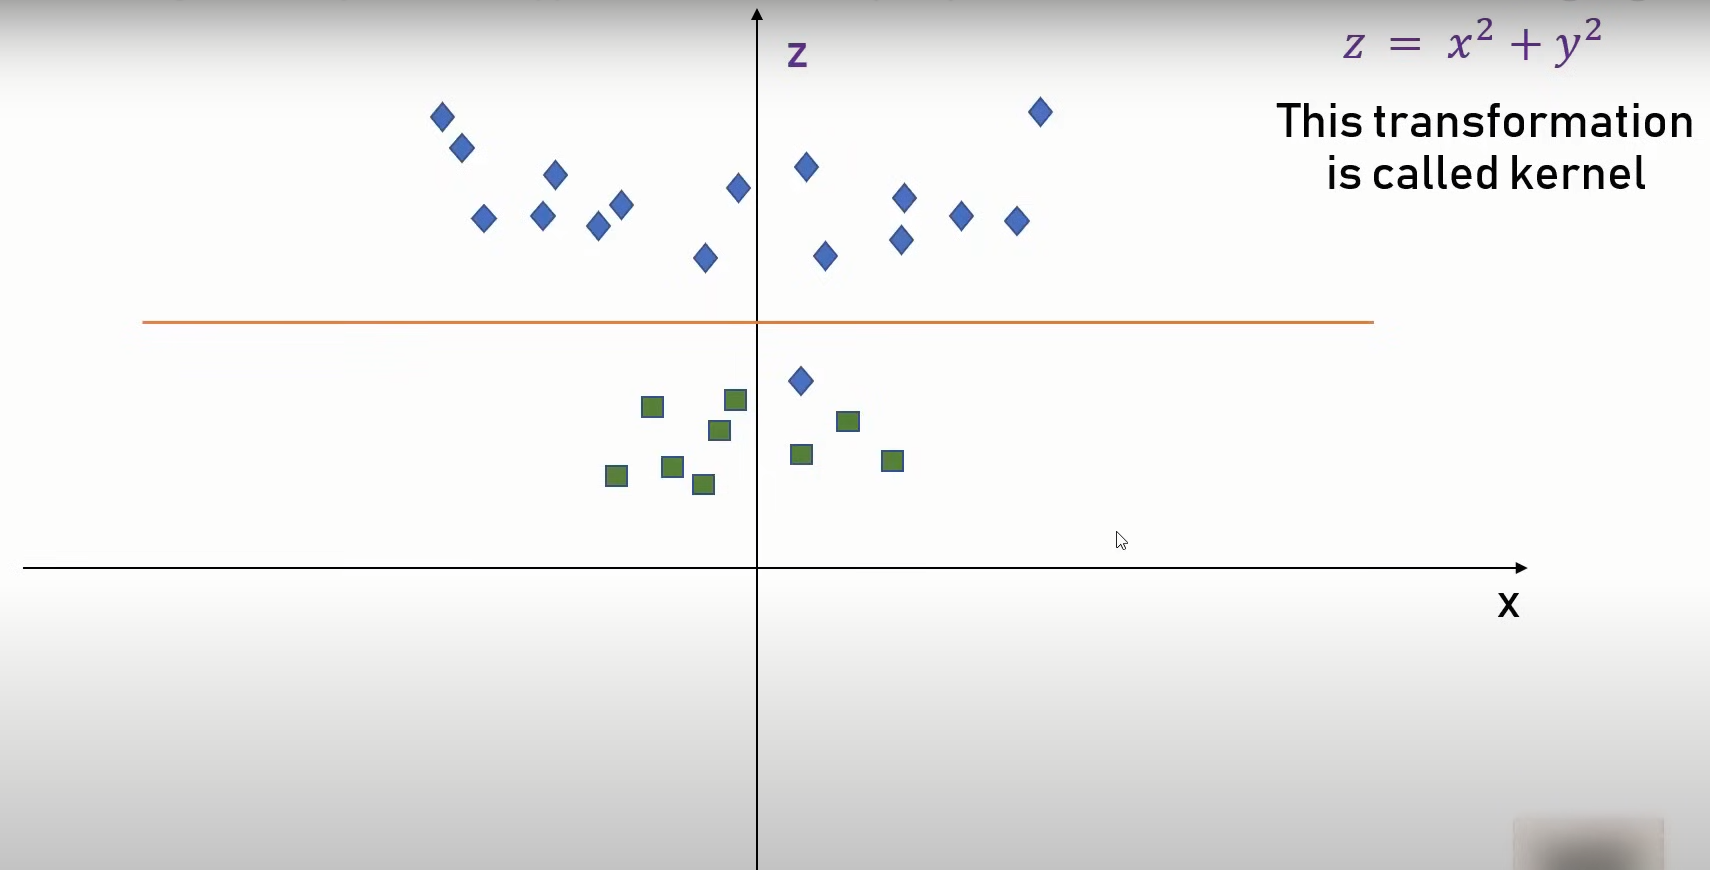

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame( iris.data , columns = iris.feature_names )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [13]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x] )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df0 = df[df.target==0 ]
df1 = df[df.target==1 ]
df2 = df[df.target==2 ]

In [17]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Text(0, 0.5, 'sepal width (cm)')

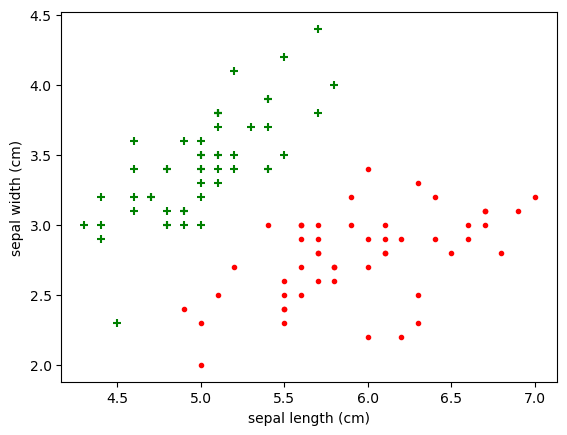

In [20]:
plt.scatter(df0['sepal length (cm)'] , df0['sepal width (cm)'] , color='green' , marker='+' )
plt.scatter(df1['sepal length (cm)'] , df1['sepal width (cm)'] , color='red' , marker='.' )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

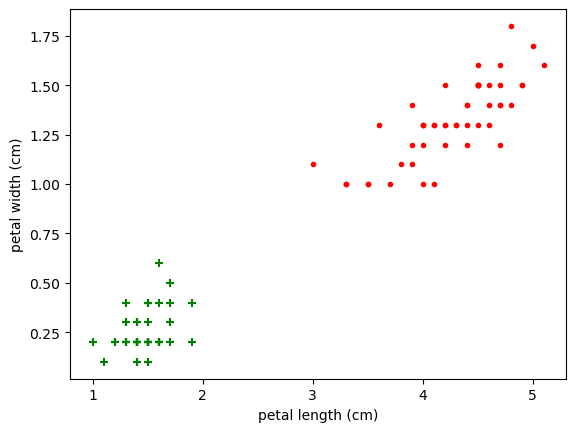

In [21]:
plt.scatter(df0['petal length (cm)'] , df0['petal width (cm)'] , color='green' , marker='+' )
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color='red' , marker='.' )
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df.drop(['target','flower_name'] , axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [34]:
x_tr , x_ts , y_tr , y_ts = train_test_split( x , y , test_size=0.2 )

In [35]:
len(x_tr)

120

In [36]:
len(x_ts)

30

In [48]:
from sklearn.svm import SVC
mod = SVC( gamma=100 )

In [49]:
mod.fit( x_tr , y_tr )

SVC(gamma=100)

In [50]:
mod.score(x_ts , y_ts)

0.5

In [51]:
mod = SVC( C=100 )

In [52]:
mod.fit( x_tr , y_tr )

SVC(C=100)

In [53]:
mod.score(x_ts , y_ts)

1.0

In [54]:
mod = SVC( kernel='linear' )

In [55]:
mod.fit( x_tr , y_tr )

SVC(kernel='linear')

In [56]:
mod.score(x_ts , y_ts)

1.0